<a href="https://colab.research.google.com/github/jaisakthism/Few-Shot-Semantic-Segmentation-Papers/blob/master/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## for data
!pip install transformers
!pip install lime
import json
import pandas as pd
import numpy as np## for plotting
import matplotlib.pyplot as plt
import seaborn as sns## for processing
import re
import nltk## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing## for explainer
from lime import lime_text## for word embedding
import gensim
import gensim.downloader as gensim_api## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K## for bert language model
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.7 MB/s 
     |████████████████████████████████| 596 kB 68.4 MB/s 
     |████████████████████████████████| 101 kB 15.5 MB/s 
     |████████████████████████████████| 6.6 MB 54.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=08568e6a9008b2a7667043108c3e27961fcdf8d60d42c89bd5404bf752025b9f
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
# Opening JSON file
f = open("/content/drive/MyDrive/social_media_images/devset_images_zipfile/devset_images_metadata.json",)
g = open("/content/drive/MyDrive/social_media_images/testset_images_zipfile/testset_images_metadata.json",)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = json.load(f)
t_data = json.load(g)

In [ ]:
for i in data['images']:
    print(i)

{'description': None, 'user_tags': ['2009 road trip', 'obrero road trip'], 'title': 'Biltmore Estate', 'license_name': 'Attribution-NonCommercial-NoDerivs License', 'user_nsid': '95156977@N00', 'image_extension_original': 'jpg', 'longitude': None, 'image_id': '3519864665', 'license_url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'date_uploaded': '1242004112', 'date_taken': '2009-05-10 08:27:33.0', 'latitude': None, 'image_url': 'http://www.flickr.com/photos/95156977@N00/3519864665/', 'user_nickname': '5 Flip-Flops (Earl)', 'capture_device': 'Canon EOS DIGITAL REBEL XT'}
{'description': None, 'user_tags': ['daulatabad', 'daulatabad fort', 'ellora', 'road trip'], 'title': 'Chand Minar', 'license_name': 'Attribution-ShareAlike License', 'user_nsid': '24574470@N00', 'image_extension_original': 'jpg', 'longitude': 75.200386, 'image_id': '4896119055', 'license_url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'date_uploaded': '1281931224', 'date_taken': '2010-08-14 13:35:10.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df = pd.json_normalize(data['images'])
t_df = pd.json_normalize(t_data['images'])

In [ ]:
print(df)

                                            description  \
0                                                  None   
1                                                  None   
2     After the flood, the boarded up stores bear up...   
3                                                  None   
4                                                  None   
...                                                 ...   
5275                                               None   
5276                                               None   
5277                                               None   
5278                                    2013 Fair Flood   
5279                       Alcatraz trip, San Francisco   

                                              user_tags  \
0                    [2009 road trip, obrero road trip]   
1      [daulatabad, daulatabad fort, ellora, road trip]   
2     [cedarrapids, createsouthroadtrip2009, disaste...   
3             [cork, enchente, flood, ireland, irlanda]

In [ ]:
pd.set_option('display.max_columns', 15)

In [ ]:
print(df)

                                            description  \
0                                                  None   
1                                                  None   
2     After the flood, the boarded up stores bear up...   
3                                                  None   
4                                                  None   
...                                                 ...   
5275                                               None   
5276                                               None   
5277                                               None   
5278                                    2013 Fair Flood   
5279                       Alcatraz trip, San Francisco   

                                              user_tags  \
0                    [2009 road trip, obrero road trip]   
1      [daulatabad, daulatabad fort, ellora, road trip]   
2     [cedarrapids, createsouthroadtrip2009, disaste...   
3             [cork, enchente, flood, ireland, irlanda]

In [ ]:
print(t_df)

                                            description  \
0     At times, the level of Hoar Oak Water on Exmoo...   
1     The site of former mass graves. The graves use...   
2     The rains had hit hard in Siem Reap and the pa...   
3     War Eagle Mill, located along the War Eagle Cr...   
4     Some guy is keeping some buffalo down the road...   
...                                                 ...   
1315                                               None   
1316                                               None   
1317             The ford at Eynsford, 15 February 2014   
1318              Falls at Ennistymon during the floods   
1319                         Our lovely British Summer.   

                                              user_tags  \
0     [deep, depth, devon, england, exmoor, flood, f...   
1                       [ cambodia,  history, genocide]   
2                                                    []   
3     [arkansas, creek, eureka springs, gristmill, h...

In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
nltk.download('stopwords')

lst_stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,description,user_tags,title,license_name,user_nsid,image_extension_original,longitude,image_id,license_url,date_uploaded,date_taken,latitude,image_url,user_nickname,capture_device
0,None,"[2009 road trip, obrero road trip]",Biltmore Estate,Attribution-NonCommercial-NoDerivs License,95156977@N00,jpg,NaN,3519864665,http://creativecommons.org/licenses/by-nc-nd/2.0/,1242004112,2009-05-10 08:27:33.0,NaN,http://www.flickr.com/photos/95156977@N00/3519...,5 Flip-Flops (Earl),Canon EOS DIGITAL REBEL XT
1,None,"[daulatabad, daulatabad fort, ellora, road trip]",Chand Minar,Attribution-ShareAlike License,24574470@N00,jpg,75.200386,4896119055,http://creativecommons.org/licenses/by-sa/2.0/,1281931224,2010-08-14 13:35:10.0,19.939383,http://www.flickr.com/photos/24574470@N00/4896...,sankarshan,NIKON CORPORATION NIKON D90
2,"After the flood, the boarded up stores bear up...","[cedarrapids, createsouthroadtrip2009, disaste...",Uplifting Graffiti,Attribution License,73451168@N00,jpg,NaN,3468473862,http://creativecommons.org/licenses/by/2.0/,1240493762,2009-04-21 18:07:56.0,NaN,http://www.flickr.com/photos/73451168@N00/3468...,J Wynia,Panasonic DMC-TZ5
3,None,"[cork, enchente, flood, ireland, irlanda]",DSCF6487,Attribution-NonCommercial-NoDerivs License,12947023@N00,jpg,-8.621177,4120853942,http://creativecommons.org/licenses/by-nc-nd/2.0/,1258754762,2009-11-20 15:16:40.0,51.889603,http://www.flickr.com/photos/12947023@N00/4120...,guileite,FUJIFILM FinePix S6000fd
4,None,"[athens georgia, brown, current, flood, mud, r...",Oconoe river - flooded,Attribution License,60704492@N00,jpg,-83.368265,4436083254,http://creativecommons.org/licenses/by/2.0/,1268676971,2010-03-13 15:14:04.0,33.949149,http://www.flickr.com/photos/60704492@N00/4436...,The_Gut,Canon PowerShot SX10 IS


In [ ]:
t_df.head()

,description,user_tags,title,license_name,user_nsid,image_extension_original,longitude,image_id,license_url,date_uploaded,date_taken,latitude,image_url,user_nickname,capture_device
0,"At times, the level of Hoar Oak Water on Exmoo...","[deep, depth, devon, england, exmoor, flood, f...",Shallow Water,Attribution License,16436271@N02,jpg,-3.731144,10254817335,http://creativecommons.org/licenses/by/2.0/,1381696902,2013-10-08 12:19:04.0,51.216131,http://www.flickr.com/photos/16436271@N02/1025...,john shortland,Panasonic DMC-FS35
1,The site of former mass graves. The graves use...,"[ cambodia, history, genocide]",Killing fields,Attribution-NonCommercial License,55174923@N00,jpg,NaN,347783223,http://creativecommons.org/licenses/by-nc/2.0/,1168097833,2007-01-04 09:19:44.0,NaN,http://www.flickr.com/photos/55174923@N00/3477...,sdr. mohamad lutfi hakim ariff,SONY DSLR-A100
2,The rains had hit hard in Siem Reap and the pa...,[],Cambodia - flooded path to temple 2,Attribution-NonCommercial-NoDerivs License,8449215@N05,jpg,NaN,6310531921,http://creativecommons.org/licenses/by-nc-nd/2.0/,1320371442,2011-09-22 07:04:22.0,NaN,http://www.flickr.com/photos/8449215@N05/63105...,ulricjoh,Canon VIXIA HF G10
3,"War Eagle Mill, located along the War Eagle Cr...","[arkansas, creek, eureka springs, gristmill, h...",War Eagle Mill,Attribution-NonCommercial License,18935424@N00,jpg,-93.943023,8329435841,http://creativecommons.org/licenses/by-nc/2.0/,1356969338,2012-12-30 14:22:15.0,36.267480,http://www.flickr.com/photos/18935424@N00/8329...,Daniel Weber,Canon EOS 5D Mark II
4,Some guy is keeping some buffalo down the road...,"[bogue chitto, buffalo, cannon, eos, farm, hom...",20090131_7286,Attribution-NoDerivs License,36016146@N04,jpg,-90.557856,3330434964,http://creativecommons.org/licenses/by-nd/2.0/,1236235520,2009-01-31 12:23:30.0,31.348634,http://www.flickr.com/photos/36016146@N04/3330...,Ludie Cochrane,Canon EOS DIGITAL REBEL XTi


In [ ]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')
df["text_clean"] = df["description"].apply(lambda x:
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True,
          lst_stopwords=lst_stopwords))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df.head()

,description,user_tags,title,license_name,user_nsid,image_extension_original,longitude,...,date_uploaded,date_taken,latitude,image_url,user_nickname,capture_device,text_clean
0,None,"[2009 road trip, obrero road trip]",Biltmore Estate,Attribution-NonCommercial-NoDerivs License,95156977@N00,jpg,NaN,...,1242004112,2009-05-10 08:27:33.0,NaN,http://www.flickr.com/photos/95156977@N00/3519...,5 Flip-Flops (Earl),Canon EOS DIGITAL REBEL XT,none
1,None,"[daulatabad, daulatabad fort, ellora, road trip]",Chand Minar,Attribution-ShareAlike License,24574470@N00,jpg,75.200386,...,1281931224,2010-08-14 13:35:10.0,19.939383,http://www.flickr.com/photos/24574470@N00/4896...,sankarshan,NIKON CORPORATION NIKON D90,none
2,"After the flood, the boarded up stores bear up...","[cedarrapids, createsouthroadtrip2009, disaste...",Uplifting Graffiti,Attribution License,73451168@N00,jpg,NaN,...,1240493762,2009-04-21 18:07:56.0,NaN,http://www.flickr.com/photos/73451168@N00/3468...,J Wynia,Panasonic DMC-TZ5,flood boarded store bear uplifting graffiti
3,None,"[cork, enchente, flood, ireland, irlanda]",DSCF6487,Attribution-NonCommercial-NoDerivs License,12947023@N00,jpg,-8.621177,...,1258754762,2009-11-20 15:16:40.0,51.889603,http://www.flickr.com/photos/12947023@N00/4120...,guileite,FUJIFILM FinePix S6000fd,none
4,None,"[athens georgia, brown, current, flood, mud, r...",Oconoe river - flooded,Attribution License,60704492@N00,jpg,-83.368265,...,1268676971,2010-03-13 15:14:04.0,33.949149,http://www.flickr.com/photos/60704492@N00/4436...,The_Gut,Canon PowerShot SX10 IS,none


In [ ]:
nltk.download('wordnet')
t_df["text_clean"] = t_df["description"].apply(lambda x:
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True,
          lst_stopwords=lst_stopwords))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
t_df.head()

,description,user_tags,title,license_name,user_nsid,image_extension_original,longitude,...,date_uploaded,date_taken,latitude,image_url,user_nickname,capture_device,text_clean
0,"At times, the level of Hoar Oak Water on Exmoo...","[deep, depth, devon, england, exmoor, flood, f...",Shallow Water,Attribution License,16436271@N02,jpg,-3.731144,...,1381696902,2013-10-08 12:19:04.0,51.216131,http://www.flickr.com/photos/16436271@N02/1025...,john shortland,Panasonic DMC-FS35,time level hoar oak water exmoor rise sharply ...
1,The site of former mass graves. The graves use...,"[ cambodia, history, genocide]",Killing fields,Attribution-NonCommercial License,55174923@N00,jpg,NaN,...,1168097833,2007-01-04 09:19:44.0,NaN,http://www.flickr.com/photos/55174923@N00/3477...,sdr. mohamad lutfi hakim ariff,SONY DSLR-A100,site former mass graf graf used deeper floodin...
2,The rains had hit hard in Siem Reap and the pa...,[],Cambodia - flooded path to temple 2,Attribution-NonCommercial-NoDerivs License,8449215@N05,jpg,NaN,...,1320371442,2011-09-22 07:04:22.0,NaN,http://www.flickr.com/photos/8449215@N05/63105...,ulricjoh,Canon VIXIA HF G10,rain hit hard siem reap path temple flooded
3,"War Eagle Mill, located along the War Eagle Cr...","[arkansas, creek, eureka springs, gristmill, h...",War Eagle Mill,Attribution-NonCommercial License,18935424@N00,jpg,-93.943023,...,1356969338,2012-12-30 14:22:15.0,36.267480,http://www.flickr.com/photos/18935424@N00/8329...,Daniel Weber,Canon EOS 5D Mark II,war eagle mill located along war eagle creek n...
4,Some guy is keeping some buffalo down the road...,"[bogue chitto, buffalo, cannon, eos, farm, hom...",20090131_7286,Attribution-NoDerivs License,36016146@N04,jpg,-90.557856,...,1236235520,2009-01-31 12:23:30.0,31.348634,http://www.flickr.com/photos/36016146@N04/3330...,Ludie Cochrane,Canon EOS DIGITAL REBEL XTi,guy keeping buffalo road native mississippi ra...


In [ ]:
df.isnull().any()

description                  True
user_tags                   False
title                        True
license_name                False
user_nsid                   False
image_extension_original    False
longitude                    True
image_id                    False
license_url                 False
date_uploaded               False
date_taken                  False
latitude                     True
image_url                   False
user_nickname               False
capture_device               True
text_clean                  False
dtype: bool

In [ ]:
t_df.isnull().any()

description                  True
user_tags                   False
title                        True
license_name                False
user_nsid                   False
image_extension_original    False
longitude                    True
image_id                    False
license_url                 False
date_uploaded               False
date_taken                  False
latitude                     True
image_url                   False
user_nickname               False
capture_device               True
text_clean                  False
dtype: bool

In [ ]:
#df = df.fillna(lambda x: x.median())
df = df.fillna(method='ffill')
t_df = t_df.fillna(method='ffill')


In [ ]:
df.head()

,description,user_tags,title,license_name,user_nsid,image_extension_original,longitude,...,date_uploaded,date_taken,latitude,image_url,user_nickname,capture_device,text_clean
0,None,"[2009 road trip, obrero road trip]",Biltmore Estate,Attribution-NonCommercial-NoDerivs License,95156977@N00,jpg,NaN,...,1242004112,2009-05-10 08:27:33.0,NaN,http://www.flickr.com/photos/95156977@N00/3519...,5 Flip-Flops (Earl),Canon EOS DIGITAL REBEL XT,none
1,None,"[daulatabad, daulatabad fort, ellora, road trip]",Chand Minar,Attribution-ShareAlike License,24574470@N00,jpg,75.200386,...,1281931224,2010-08-14 13:35:10.0,19.939383,http://www.flickr.com/photos/24574470@N00/4896...,sankarshan,NIKON CORPORATION NIKON D90,none
2,"After the flood, the boarded up stores bear up...","[cedarrapids, createsouthroadtrip2009, disaste...",Uplifting Graffiti,Attribution License,73451168@N00,jpg,75.200386,...,1240493762,2009-04-21 18:07:56.0,19.939383,http://www.flickr.com/photos/73451168@N00/3468...,J Wynia,Panasonic DMC-TZ5,flood boarded store bear uplifting graffiti
3,"After the flood, the boarded up stores bear up...","[cork, enchente, flood, ireland, irlanda]",DSCF6487,Attribution-NonCommercial-NoDerivs License,12947023@N00,jpg,-8.621177,...,1258754762,2009-11-20 15:16:40.0,51.889603,http://www.flickr.com/photos/12947023@N00/4120...,guileite,FUJIFILM FinePix S6000fd,none
4,"After the flood, the boarded up stores bear up...","[athens georgia, brown, current, flood, mud, r...",Oconoe river - flooded,Attribution License,60704492@N00,jpg,-83.368265,...,1268676971,2010-03-13 15:14:04.0,33.949149,http://www.flickr.com/photos/60704492@N00/4436...,The_Gut,Canon PowerShot SX10 IS,none


In [ ]:
t_df.head()

,description,user_tags,title,license_name,user_nsid,image_extension_original,longitude,...,date_uploaded,date_taken,latitude,image_url,user_nickname,capture_device,text_clean
0,"At times, the level of Hoar Oak Water on Exmoo...","[deep, depth, devon, england, exmoor, flood, f...",Shallow Water,Attribution License,16436271@N02,jpg,-3.731144,...,1381696902,2013-10-08 12:19:04.0,51.216131,http://www.flickr.com/photos/16436271@N02/1025...,john shortland,Panasonic DMC-FS35,time level hoar oak water exmoor rise sharply ...
1,The site of former mass graves. The graves use...,"[ cambodia, history, genocide]",Killing fields,Attribution-NonCommercial License,55174923@N00,jpg,-3.731144,...,1168097833,2007-01-04 09:19:44.0,51.216131,http://www.flickr.com/photos/55174923@N00/3477...,sdr. mohamad lutfi hakim ariff,SONY DSLR-A100,site former mass graf graf used deeper floodin...
2,The rains had hit hard in Siem Reap and the pa...,[],Cambodia - flooded path to temple 2,Attribution-NonCommercial-NoDerivs License,8449215@N05,jpg,-3.731144,...,1320371442,2011-09-22 07:04:22.0,51.216131,http://www.flickr.com/photos/8449215@N05/63105...,ulricjoh,Canon VIXIA HF G10,rain hit hard siem reap path temple flooded
3,"War Eagle Mill, located along the War Eagle Cr...","[arkansas, creek, eureka springs, gristmill, h...",War Eagle Mill,Attribution-NonCommercial License,18935424@N00,jpg,-93.943023,...,1356969338,2012-12-30 14:22:15.0,36.267480,http://www.flickr.com/photos/18935424@N00/8329...,Daniel Weber,Canon EOS 5D Mark II,war eagle mill located along war eagle creek n...
4,Some guy is keeping some buffalo down the road...,"[bogue chitto, buffalo, cannon, eos, farm, hom...",20090131_7286,Attribution-NoDerivs License,36016146@N04,jpg,-90.557856,...,1236235520,2009-01-31 12:23:30.0,31.348634,http://www.flickr.com/photos/36016146@N04/3330...,Ludie Cochrane,Canon EOS DIGITAL REBEL XTi,guy keeping buffalo road native mississippi ra...


In [ ]:
Y = pd.read_csv("/content/drive/MyDrive/social_media_images/devset_images_zipfile/devset_images_gt.csv", header = None)
TY = pd.read_csv("/content/drive/MyDrive/social_media_images/testset_images_zipfile/testset_images_gt.csv", header = None)


In [ ]:
#from tensorflow.keras.utils import to_categorical

Y = Y.iloc[:, 1].values
TY = TY.iloc[:, 1].values

#Y = to_categorical(Y)

In [ ]:
print(Y)
print(TY)

[0 0 0 ... 0 0 0]
[0 0 1 ... 1 1 0]


In [ ]:
## split dataset
#df_train, df_test, y_train, y_test = model_selection.train_test_split(df, Y,test_size=0.3)
df_train = df
df_test = t_df
y_train = Y
y_test = TY

In [ ]:
print(y_test)

[0 0 1 ... 1 1 0]


In [ ]:
#y_train = df_train["image_id"].values
#y_test = df_test["image_id"].values

In [ ]:
print(y_train)

[0 0 0 ... 0 0 0]


In [ ]:
## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

In [ ]:
## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [ ]:
corpus = df_train["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [ ]:
t_corpus = df_test["text_clean"]
vectorizer.fit(t_corpus)
X_test = vectorizer.transform(t_corpus)
t_dic_vocabulary = vectorizer.vocabulary_

Text(0.5, 1.0, 'Sparse Matrix Sample')

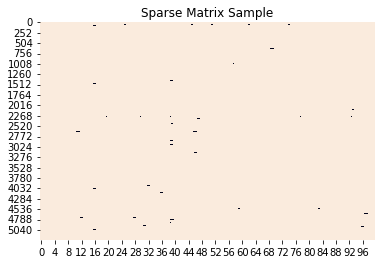

In [ ]:
sns.heatmap(X_train.todense()
[:,np.random.randint(0,X_train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [ ]:
classifier = naive_bayes.MultinomialNB()

In [ ]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", classifier)])## train classifier
model["classifier"].fit(X_train, y_train)## test
X_test = df_test["text_clean"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [ ]:
print(predicted_prob)

[[0.61774529 0.38225471]
 [0.41302384 0.58697616]
 [0.60396034 0.39603966]
 ...
 [0.46287918 0.53712082]
 [0.60808395 0.39191605]
 [0.694938   0.305062  ]]


In [ ]:
import sklearn.metrics as metrics

accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy:",  round(accuracy*100,2))


Accuracy: 57.65


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72       840
           1       0.24      0.08      0.12       480

    accuracy                           0.58      1320
   macro avg       0.43      0.47      0.42      1320
weighted avg       0.48      0.58      0.50      1320



In [ ]:
import sklearn.ensemble as ske

Accuracy: 0.58
Detail:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       840
           1       0.24      0.08      0.12       480

    accuracy                           0.58      1320
   macro avg       0.43      0.47      0.42      1320
weighted avg       0.48      0.58      0.50      1320



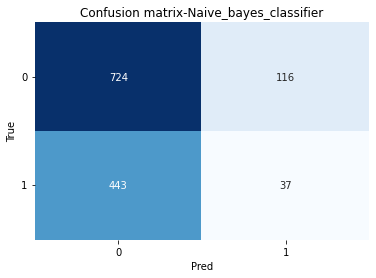

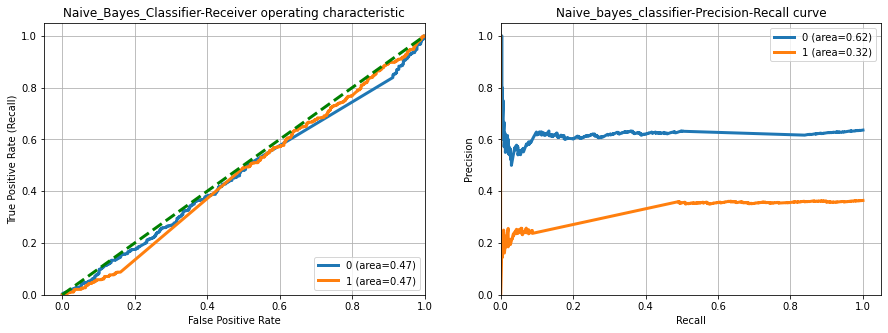

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
#auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
#print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,
       yticklabels=classes, title="Confusion matrix-Naive_bayes_classifier")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3,
              label='{0} (area={1:0.2f})'.format(classes[i],
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='green', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],
          xlabel='False Positive Rate',
          ylabel="True Positive Rate (Recall)",
          title="Naive_Bayes_Classifier-Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3,
               label='{0} (area={1:0.2f})'.format(classes[i],
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',
          ylabel="Precision", title="Naive_bayes_classifier-Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [ ]:
 classifier1 = ske.RandomForestClassifier(n_estimators=50)

In [ ]:
## pipeline
model1 = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", classifier1)])## train classifier
model1["classifier"].fit(X_train, y_train)## test
X_test = df_test["text_clean"].values
predicted_RF = model1.predict(X_test)
predicted_prob_RF = model1.predict_proba(X_test)

In [ ]:
print(predicted_prob_RF)

[[0.55982194 0.44017806]
 [0.61504133 0.38495867]
 [0.63996847 0.36003153]
 ...
 [0.63216495 0.36783505]
 [0.68987563 0.31012437]
 [0.70895726 0.29104274]]


In [ ]:
accuracy_RF = metrics.accuracy_score(y_test, predicted_RF)
print("Accuracy:",  round(accuracy_RF*100,2))

Accuracy: 61.74


In [ ]:
print(metrics.classification_report(y_test, predicted_RF))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76       840
           1       0.21      0.02      0.03       480

    accuracy                           0.62      1320
   macro avg       0.42      0.49      0.40      1320
weighted avg       0.48      0.62      0.50      1320



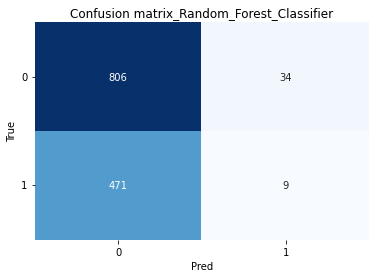

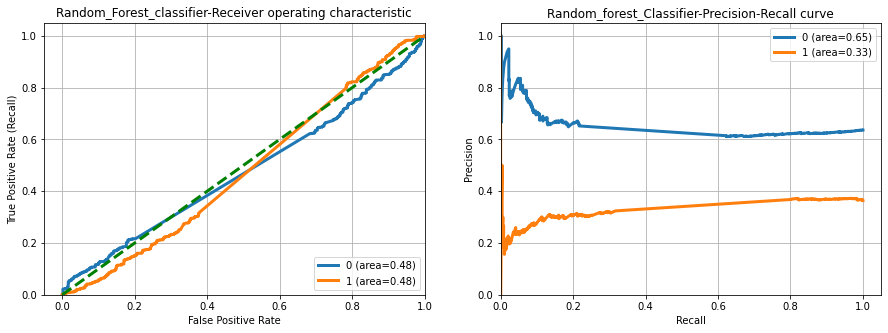

In [ ]:
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted_RF)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,
       yticklabels=classes, title="Confusion matrix_Random_Forest_Classifier")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],
                           predicted_prob_RF[:,i])
    ax[0].plot(fpr, tpr, lw=3,
              label='{0} (area={1:0.2f})'.format(classes[i],
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='green', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],
          xlabel='False Positive Rate',
          ylabel="True Positive Rate (Recall)",
          title="Random_Forest_classifier-Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_RF[:,i])
    ax[1].plot(recall, precision, lw=3,
               label='{0} (area={1:0.2f})'.format(classes[i],
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',
          ylabel="Precision", title="Random_forest_Classifier-Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [ ]:
from sklearn import tree
classifier2 =tree.DecisionTreeClassifier(max_depth=10)

In [ ]:
## pipeline
model2 = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", classifier2)])## train classifier
model2["classifier"].fit(X_train, y_train)## test
X_test = df_test["text_clean"].values
predicted_DT = model2.predict(X_test)
predicted_prob_DT = model2.predict_proba(X_test)

In [ ]:
print(predicted_prob_DT)

[[0.6403556 0.3596444]
 [0.6403556 0.3596444]
 [0.6403556 0.3596444]
 ...
 [0.6403556 0.3596444]
 [0.6403556 0.3596444]
 [0.6403556 0.3596444]]


In [ ]:
accuracy_DT = metrics.accuracy_score(y_test, predicted_DT)
print("Accuracy:",  round(accuracy_DT*100,2))

Accuracy: 63.33


In [ ]:
print(metrics.classification_report(y_test, predicted_DT))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       840
           1       0.00      0.00      0.00       480

    accuracy                           0.63      1320
   macro avg       0.32      0.50      0.39      1320
weighted avg       0.40      0.63      0.49      1320



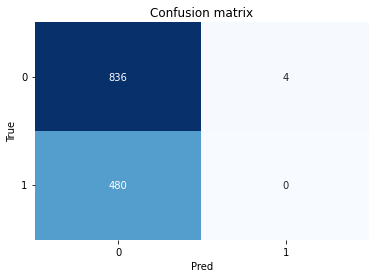

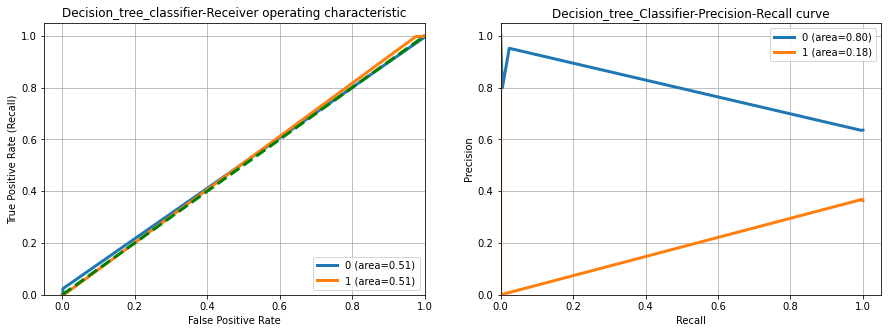

In [ ]:
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted_DT)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],
                           predicted_prob_DT[:,i])
    ax[0].plot(fpr, tpr, lw=3,
              label='{0} (area={1:0.2f})'.format(classes[i],
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='green', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],
          xlabel='False Positive Rate',
          ylabel="True Positive Rate (Recall)",
          title="Decision_tree_classifier-Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_DT[:,i])
    ax[1].plot(recall, precision, lw=3,
               label='{0} (area={1:0.2f})'.format(classes[i],
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',
          ylabel="Precision", title="Decision_tree_Classifier-Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [ ]:
from sklearn import svm

In [ ]:
classifier3 = svm.SVC(probability=True)

In [ ]:
## pipeline
model3 = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", classifier3)])## train classifier
model3["classifier"].fit(X_train, y_train)## test
X_test = df_test["text_clean"].values
predicted_DT = model3.predict(X_test)
predicted_prob_DT = model3.predict_proba(X_test)

In [ ]:
print(predicted_prob_DT)
print(type(predicted_prob_DT))

[[0.60166309 0.39833691]
 [0.57437103 0.42562897]
 [0.61202801 0.38797199]
 ...
 [0.54270033 0.45729967]
 [0.60849975 0.39150025]
 [0.65310143 0.34689857]]
<class 'numpy.ndarray'>


In [ ]:
accuracy_DT = metrics.accuracy_score(y_test, predicted_DT)
print("Accuracy:",  round(accuracy_DT*100,2))

Accuracy: 63.79


In [ ]:
print(metrics.classification_report(y_test, predicted_DT))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       840
           1       0.75      0.01      0.01       480

    accuracy                           0.64      1320
   macro avg       0.69      0.50      0.40      1320
weighted avg       0.68      0.64      0.50      1320



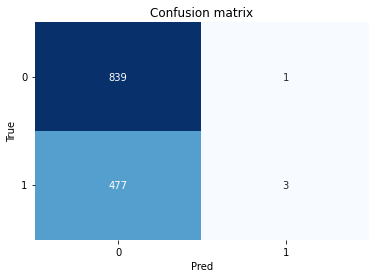

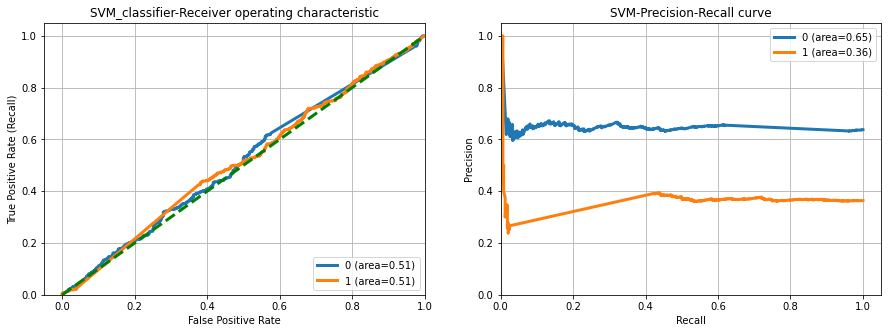

In [ ]:
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted_DT)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],
                           predicted_prob_DT[:,i])
    ax[0].plot(fpr, tpr, lw=3,
              label='{0} (area={1:0.2f})'.format(classes[i],
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='green', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],
          xlabel='False Positive Rate',
          ylabel="True Positive Rate (Recall)",
          title="SVM_classifier-Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_DT[:,i])
    ax[1].plot(recall, precision, lw=3,
               label='{0} (area={1:0.2f})'.format(classes[i],
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',
          ylabel="Precision", title="SVM-Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [ ]:
nlp = gensim_api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
corpus = df_train["text_clean"]
## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1])
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)
## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus,
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus],
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
## fit w2v
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300,
            window=8, min_count=1, sg=1, iter=30)

In [ ]:
word = ["flood","flooding","flooded"]
nlp[word].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(3, 300)

In [ ]:
"""word = "flood"

fig = plt.figure()## word embedding
tot_words = [word] + [tupla[0] for tupla in
                 nlp.most_similar(word, topn=20)]
X = nlp[tot_words]## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)## create dtf
df_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
df_["input"] = 0
df_["input"].iloc[0:1] = 1## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_[df_["input"]==0]['x'],
           df_[df_["input"]==0]['y'],
           df_[df_["input"]==0]['z'], c="black")
ax.scatter(df_[df_["input"]==1]['x'],
           df_[df_["input"]==1]['y'],
           df_[df_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[],
       yticklabels=[], zticklabels=[])
for label, row in df_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)"""

'word = "flood"\n\nfig = plt.figure()## word embedding\ntot_words = [word] + [tupla[0] for tupla in \n                 nlp.most_similar(word, topn=20)]\nX = nlp[tot_words]## pca to reduce dimensionality from 300 to 3\npca = manifold.TSNE(perplexity=40, n_components=3, init=\'pca\')\nX = pca.fit_transform(X)## create dtf\ndf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])\ndf_["input"] = 0\ndf_["input"].iloc[0:1] = 1## plot 3d\nfrom mpl_toolkits.mplot3d import Axes3D\nax = fig.add_subplot(111, projection=\'3d\')\nax.scatter(df_[df_["input"]==0][\'x\'], \n           df_[df_["input"]==0][\'y\'], \n           df_[df_["input"]==0][\'z\'], c="black")\nax.scatter(df_[df_["input"]==1][\'x\'], \n           df_[df_["input"]==1][\'y\'], \n           df_[df_["input"]==1][\'z\'], c="red")\nax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], \n       yticklabels=[], zticklabels=[])\nfor label, row in df_[["x","y","z"]].iterrows():\n    x, y, z = row\n    ax.text(x, y, z, s=label

In [ ]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ',
                     oov_token="NaN",
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq,
                    maxlen=15, padding="post", truncating="post")

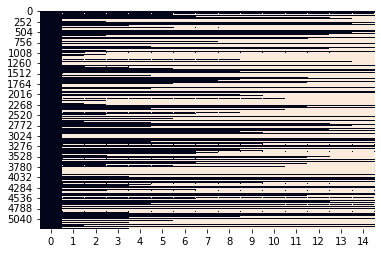

In [ ]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [ ]:
i = 0

## list of text: ["I like this", ...]
len_txt = len(df_train["text_clean"].iloc[i].split())
print("from: ", df_train["text_clean"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", df_train["text_clean"].iloc[i].split()[0],
      " -- idx in vocabulary -->",
      dic_vocabulary[df_train["text_clean"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  none | len: 1
to:  [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0] | len: 15
check:  none  -- idx in vocabulary --> 2
vocabulary:  {'NaN': 1, 'none': 2, 'flood': 3, 'river': 4, 'road': 5} ... (padding element, 0)


In [ ]:
corpus = df_test["text_clean"]
## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0,
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    ## detect common bigrams and trigrams using the fitted detectors
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
## text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")

In [ ]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
word = "flooded"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape,
      "|vector")

dic[word]: 14 |idx
embeddings[idx]: (300,) |vector


In [ ]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

## input
x_in = layers.Input(shape=(15,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],
                     output_dim=embeddings.shape[1],
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=15)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2,
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(3, activation='softmax')(x)
## compile
#mse = tf.keras.losses.MeanSquaredLogarithmicError()

model4 = models.Model(x_in, y_out)
model4.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 15, 300)      5885700     ['input_1[0][0]']                
                                                                                                  
 permute (Permute)              (None, 300, 15)      0           ['embedding[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 300, 15)      240         ['permute[0][0]']                
                                                                                              

In [ ]:
## encode y
dic_y_mapping = {n:label for n,label in
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])
## train
training = model4.fit(x=X_train, y=y_train, batch_size=256,
                     epochs=50, shuffle=True, verbose=1,
                     validation_split=0.3)

Epoch 1/50
15/15 [==============================] - 13s 116ms/step - loss: 1.0451 - accuracy: 0.6273 - val_loss: 0.9493 - val_accuracy: 0.6379
Epoch 2/50
15/15 [==============================] - 0s 15ms/step - loss: 0.8459 - accuracy: 0.6357 - val_loss: 0.7557 - val_accuracy: 0.6379
Epoch 3/50
15/15 [==============================] - 0s 16ms/step - loss: 0.7006 - accuracy: 0.6357 - val_loss: 0.6707 - val_accuracy: 0.6379
Epoch 4/50
15/15 [==============================] - 0s 15ms/step - loss: 0.6563 - accuracy: 0.6357 - val_loss: 0.6481 - val_accuracy: 0.6379
Epoch 5/50
15/15 [==============================] - 0s 15ms/step - loss: 0.6461 - accuracy: 0.6357 - val_loss: 0.6410 - val_accuracy: 0.6379
Epoch 6/50
15/15 [==============================] - 0s 15ms/step - loss: 0.6341 - accuracy: 0.6357 - val_loss: 0.6227 - val_accuracy: 0.6385
Epoch 7/50
15/15 [==============================] - 0s 16ms/step - loss: 0.6064 - accuracy: 0.6525 - val_loss: 0.5925 - val_accuracy: 0.6921
Epoch 8/50


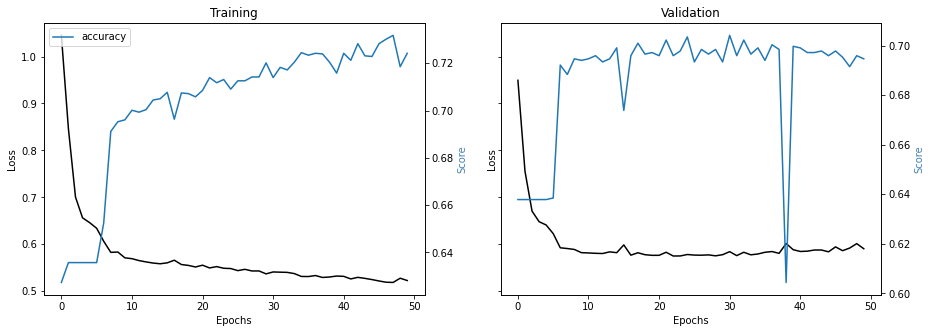

In [ ]:
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (15,5))
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [ ]:
X_test = df_test["text_clean"].values
predicted_prob_LSTM = model.predict(X_test)
predicted_proba_LSTM = model.predict_proba(X_test)

predicted_LSTM = [dic_y_mapping[np.argmax(pred)] for pred in
             predicted_prob_LSTM]

In [ ]:
print(predicted_proba_LSTM)

[[0.61774529 0.38225471]
 [0.41302384 0.58697616]
 [0.60396034 0.39603966]
 ...
 [0.46287918 0.53712082]
 [0.60808395 0.39191605]
 [0.694938   0.305062  ]]


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(TY,predicted_LSTM)
cm

array([[840,   0],
       [480,   0]])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve


print(classification_report(TY, predicted_prob_LSTM))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72       840
           1       0.24      0.08      0.12       480

    accuracy                           0.58      1320
   macro avg       0.43      0.47      0.42      1320
weighted avg       0.48      0.58      0.50      1320



Accuracy: 57.65
Detail:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       840
           1       0.24      0.08      0.12       480

    accuracy                           0.58      1320
   macro avg       0.43      0.47      0.42      1320
weighted avg       0.48      0.58      0.50      1320



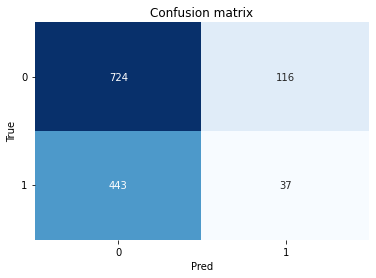

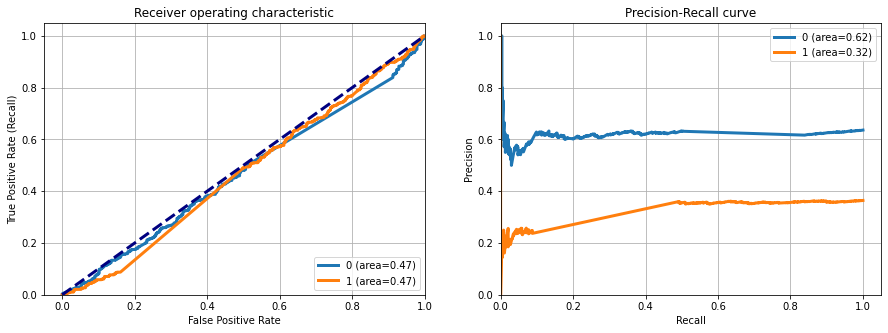

In [ ]:
classes = np.unique(TY)
y_test_array = pd.get_dummies(TY, drop_first=False).values
    ## Accuracy, Precision, Recall
accuracy = accuracy_score(TY, predicted_prob_LSTM)
#auc = metrics.mroc_auc_score(TY, predicted_prob_LSTM,
                            #multi_class="ovr")
print("Accuracy:",  round(accuracy*100,2))
#print("Auc:", round(auc,2))
print("Detail:")
print(classification_report(TY, predicted_prob_LSTM))

## Plot confusion matrix
cm = confusion_matrix(TY, predicted_prob_LSTM)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes,
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (15,5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],
                           predicted_proba_LSTM[:,i])
    ax[0].plot(fpr, tpr, lw=3,
              label='{0} (area={1:0.2f})'.format(classes[i], auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],
          xlabel='False Positive Rate',
          ylabel="True Positive Rate (Recall)",
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
                 y_test_array[:,i], predicted_proba_LSTM[:,i])
    ax[1].plot(recall, precision, lw=3,
               label='{0} (area={1:0.2f})'.format(classes[i], auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [ ]:
import transformers
from transformers import BertTokenizer
from transformers import DistilBertTokenizer, RobertaTokenizer
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def create_model(bert_model):
    input_ids = tf.keras.Input(shape=(15,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]

    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)

    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=6e-6), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model5 = create_model(bert_model)
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_2[0][0]',                
                                thPoolingAndCrossAt               'input_3[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 15,                                          

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
